# Projeto 1 - Processamento Digital de Sinais
<br /> Alunos:
<br /> Diego Maia Hamilton
<br /> Pedro Luz A. L. de M. Peixoto

## Parte 1

### a)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def signal(omega_o, t):
   return np.sin(omega_o * t)

In [2]:
n = np.arange(0, 8192, 1)
omega_s = 2*np.pi*8192
omega_o = 2*np.pi*1000
T = 1/8192

x_1000 = signal(omega_o, n * T)

### b)

In [3]:
def letra_b(n, x, freq):
    plt.suptitle(f'Senoide com Frequência {freq} Hz')
    plt.rcParams["figure.figsize"] = (16, 9)
    plt.subplot(211)
    plt.stem(n[:51], x[:51])

    plt.xlabel('n')
    plt.ylabel('x[n]')
    # plt.title('x[n] = sin($\Omega_O n/8192$)')
    plt.grid(True)

    plt.subplot(212)
    plt.plot((n * T)[:51], x[:51])

    plt.xlabel('time (s)')
    plt.ylabel('x(nT)')
    # plt.title('x(t) = sin()')
    plt.grid(True)
    plt.savefig(f'plots/signals_{freq}.png')
    plt.show()

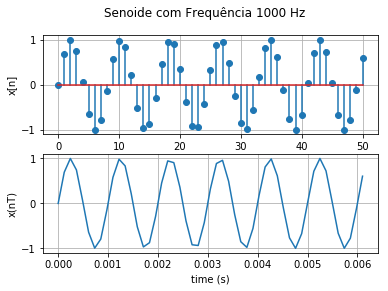

In [4]:
letra_b(n, x_1000, 1000)

### c)

In [5]:
from numpy.fft import fft, fftshift

def letra_c(x, T, freq):
    def ctfts(x, T):
        # based on MATLAB implementation of functions ctfts
        N = len(x)
        X = fftshift(fft(x, N) * (2*np.pi/N))
        w = np.linspace(-1, 1 - 1/N, N)/(2*T)

        return X, w

    def filter(x, epsilon=3e-4):
        x[np.where(np.abs(x) < epsilon)] = 0
        return x
    
    X, w = ctfts(x, T)
    
    plt.rcParams["figure.figsize"] = (12, 4)
    plt.suptitle(f'Senoide com frequência de {freq} Hz')
    plt.subplot(121)
    plt.title('Magnitude X(f)')
    plt.plot(w, np.abs(X))
    plt.ylabel('$|X(f)|$')
    plt.xlabel('Freq (Hz)')
    
    plt.subplot(122)
    plt.title('Fase X(f)')
    plt.plot(w, np.angle(filter(X), deg = True))
    plt.ylabel('$\\angle X(f)$')
    plt.xlabel('Freq (Hz)')
    plt.ylim(-100, 100, 5)
    plt.savefig(f'plots/letra_{freq}.png')
    plt.show()
    return

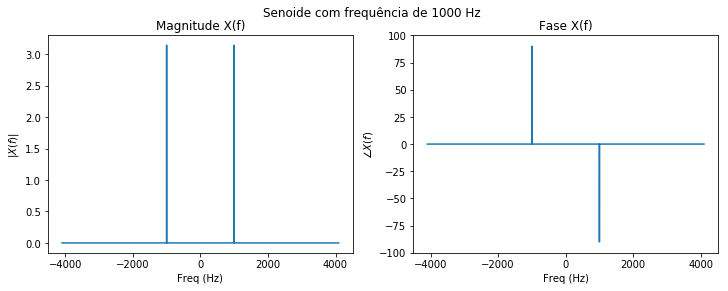

In [6]:
letra_c(x_1000, T, 1000)

<span style="color:brown"> Temos:
    $$\textit{X}(\Omega) = j \pi [\delta(\Omega + \Omega_{o}) -\delta(\Omega - \Omega_{o})].$$
    <br />
    Então $\textbf{|}\textit{X}(\Omega)\textbf{|}$ corresponde a impulsos de magnitude $\pi$ exatamente em $\Omega = \pm\Omega_{o}\text{rad/s}$, ou seja, $f = \pm 1000\text{Hz}$.
    <br />
    Considerando $x_{r}$ como uma boa aproximação para $x_{c}$ e aplicando-o a $\textbf{ctfts}$, obtivemos $\textit{X}$. Plotando $\textbf{|}\textit{X}\textbf{|}$ em função de $\omega$, é verificado que sua magnitude corresponde a impulsos de valor $\pi$ nos valores esperados de frequência, exatamente em $f = \pm 1000\text{Hz}$.
</span>

## Parte 2

### d)

In [7]:
omega_1500 = 2*np.pi*1500
x_1500 = signal(omega_1500, n * T)

omega_2000 = 2*np.pi*2000
x_2000 = signal(omega_2000, n * T)

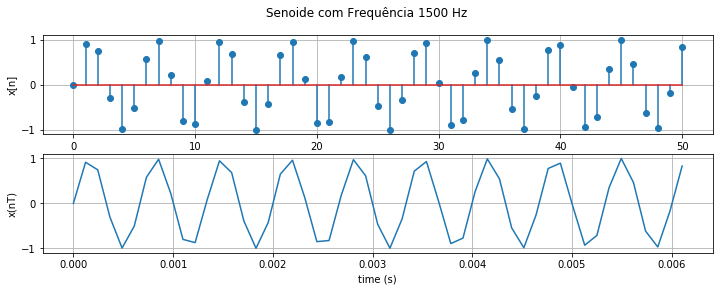

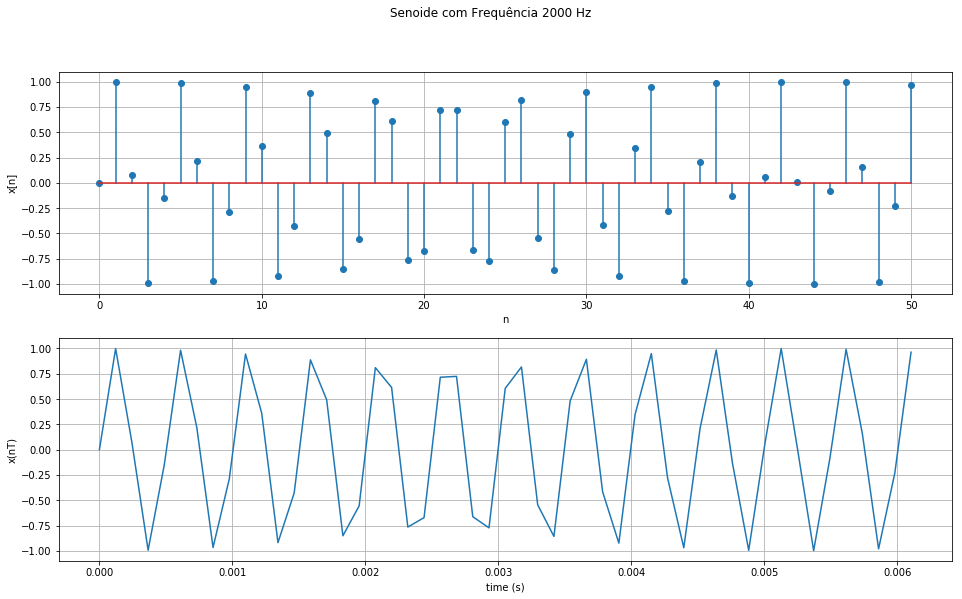

In [8]:
letra_b(n, x_1500, 1500)
letra_b(n, x_2000, 2000)

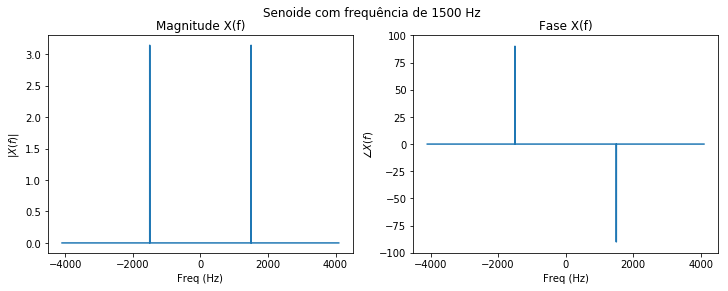

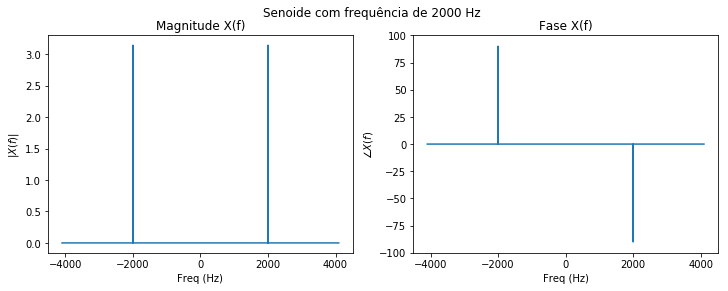

In [9]:
letra_c(x_1500, T, 1500)
letra_c(x_2000, T, 2000)

<span style="color:brown"> Novamente, percebe-se que ambos os sinais são não nulos e iguais a picos, que se aproximam bem de impulsos, em $\pm \Omega_{o}$ ou $ f = \pm 1500 \text{Hz}$ e  $ f = \pm 1000 \text{Hz}$, respectivamente, como esperado.
    A fase estava mostrando um comportamento irregular, mas isso foi corrigido ao implementar-se um filtro de valores muito pequenos na transformada do sinal $X(f)$ antes de se plotar a fase.
 </spam>

### e)

In [10]:
import scipy.io.wavfile as wav

In [11]:
def letra_e(x, T, freq):
    wave = np.array(x)# * 65536, dtype = 'int')
    rate = int(1/T)
    wav.write(f'sounds/signal_{freq}.wav', rate, wave)

In [12]:
letra_e(x_1000, T, 1000)
letra_e(x_1500, T, 1500)
letra_e(x_2000, T, 2000)

<span style="color:brown">
    Sim, conforme aumentamos $\Omega_{o}$ o som fica qualitativamente mais agudo.
</span>

### f)

In [13]:
omega_3500 = 2*np.pi*3500
x_3500 = signal(omega_3500, n * T)

omega_4000 = 2*np.pi*4000
x_4000 = signal(omega_4000, n * T)

omega_4500 = 2*np.pi*4500
x_4500 = signal(omega_4500, n * T)

omega_5000 = 2*np.pi*5000
x_5000 = signal(omega_5000, n * T)

omega_5500 = 2*np.pi*5500
x_5500 = signal(omega_5500, n * T)

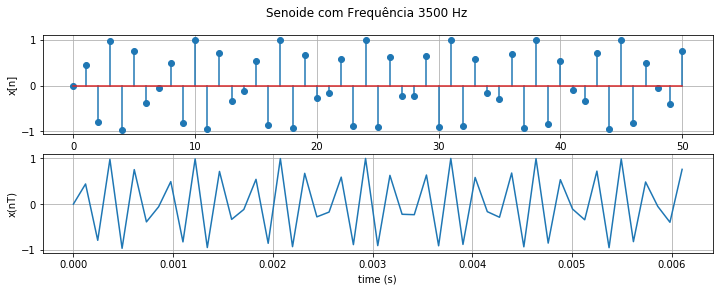

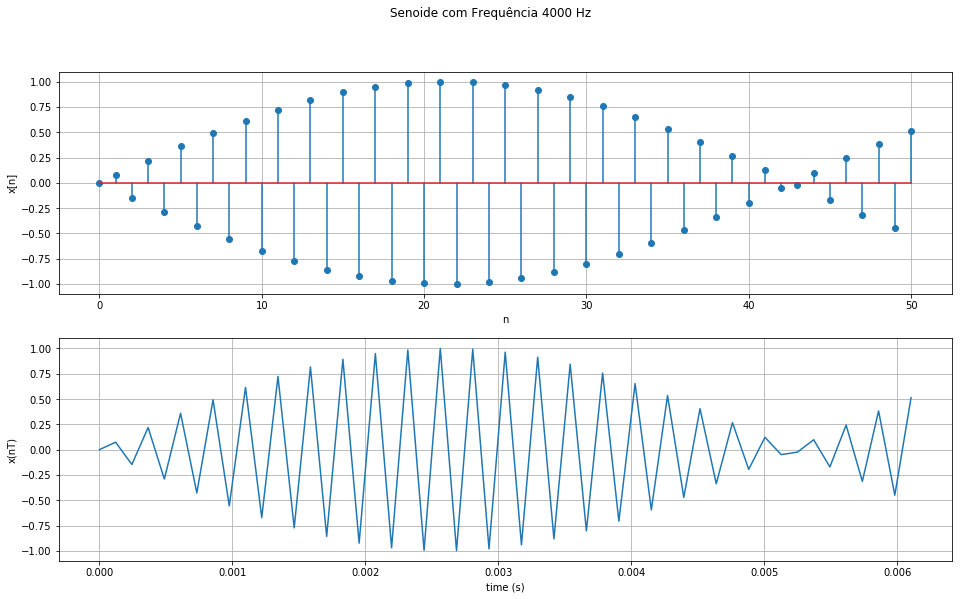

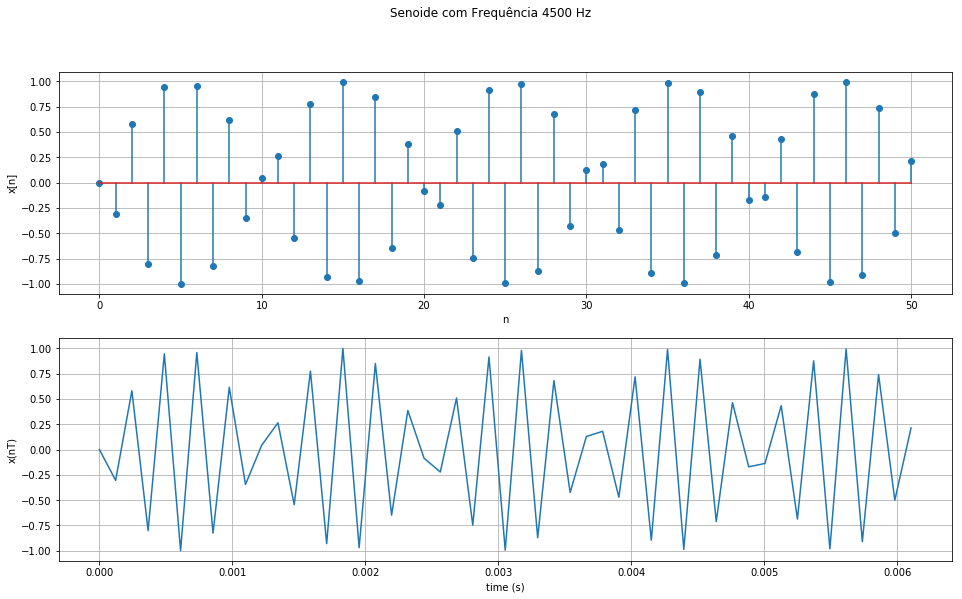

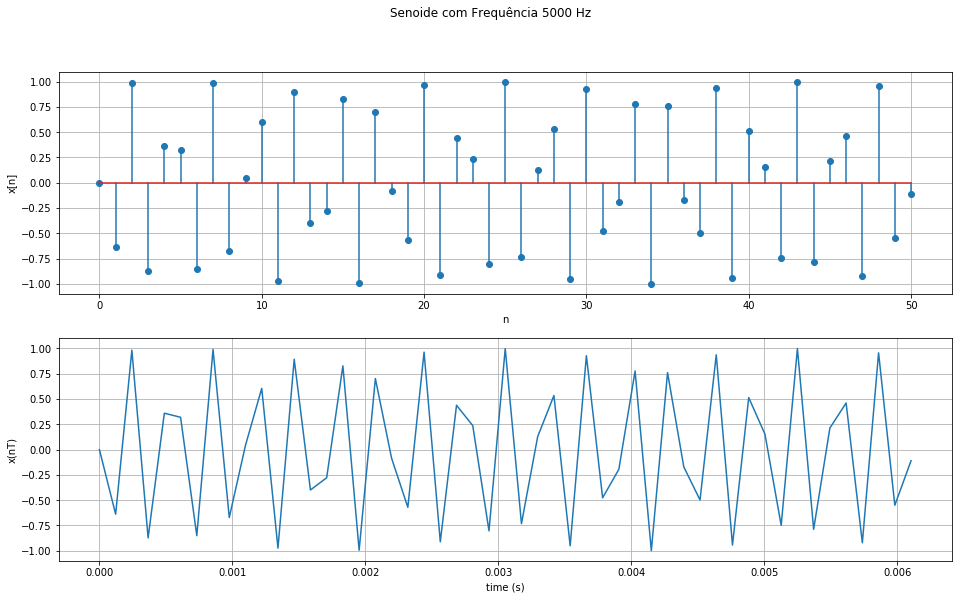

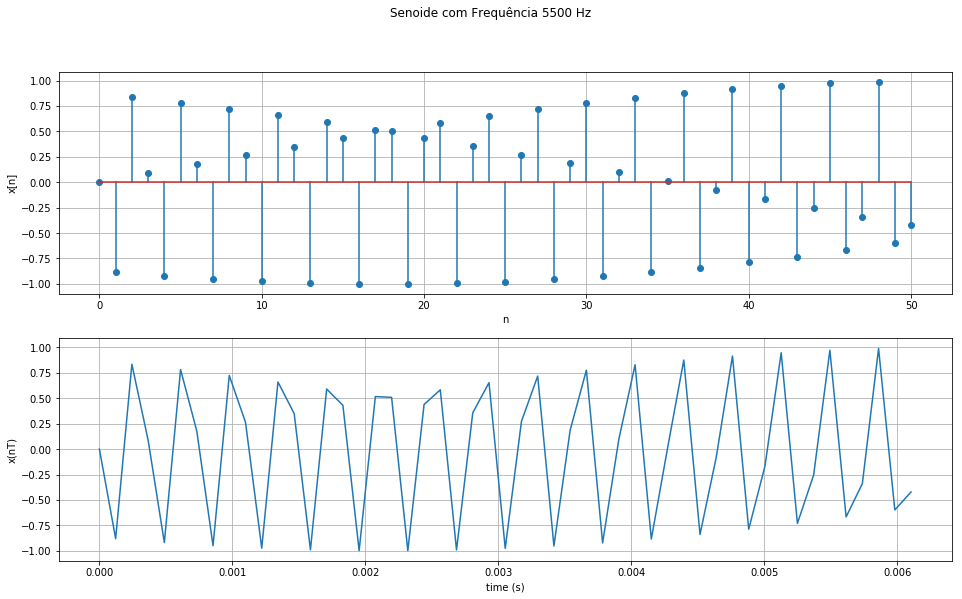

In [14]:
letra_b(n, x_3500, 3500)
letra_b(n, x_4000, 4000)
letra_b(n, x_4500, 4500)
letra_b(n, x_5000, 5000)
letra_b(n, x_5500, 5500)

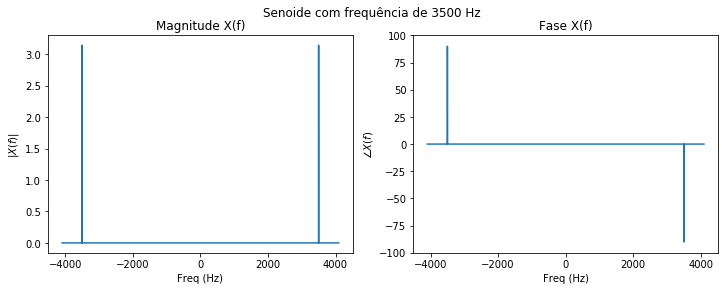

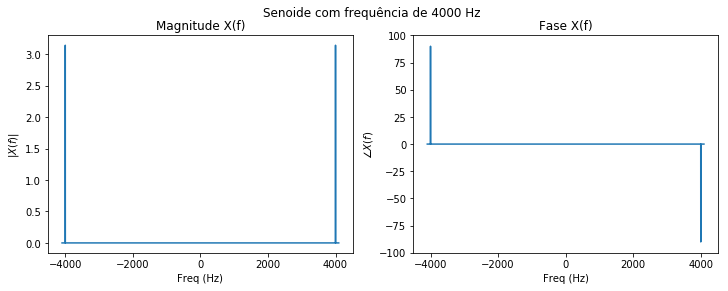

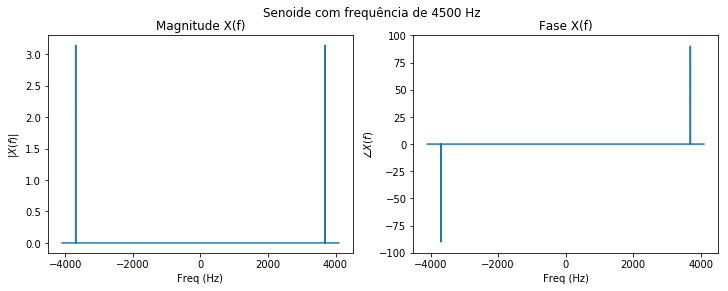

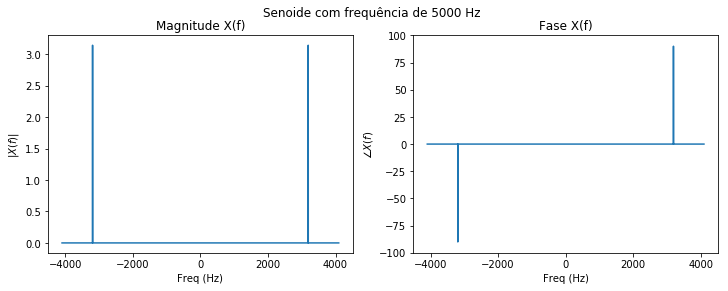

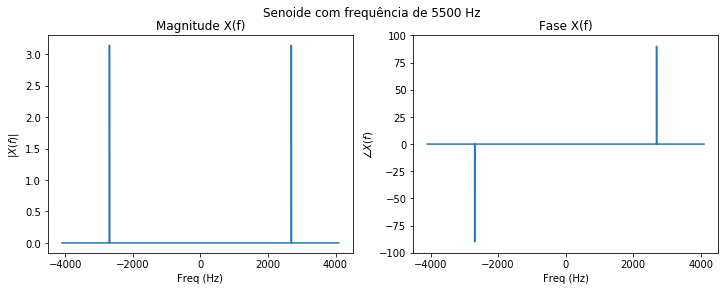

In [15]:
letra_c(x_3500, T, 3500)
letra_c(x_4000, T, 4000)
letra_c(x_4500, T, 4500)
letra_c(x_5000, T, 5000)
letra_c(x_5500, T, 5500)

In [16]:
letra_e(x_3500, T, 3500)
letra_e(x_4000, T, 4000)
letra_e(x_4500, T, 4500)
letra_e(x_5000, T, 5000)
letra_e(x_5500, T, 5500)

<span style="color:brown">
   Para os sinais ressoando a $F_{o} = 3500 \text{Hz}$ e $4000 \text{Hz}$ à mesma taxa de amostragem $F_{s} = 8192 \text{Hz}$, os sons tocados são audivelmente mais agudos, e assim era esperado.
    <br />
    Para os sinais ressoando a $F_{o} = 4500 \text{Hz}$, $5000 \text{Hz}$ e $5500 \text{Hz}$ à mesma taxa de amostragem $F_{s} = 8192 \text{Hz}$ porém, os sons tocados são audivelmente mais graves comparados aos de frequências mais baixas.
    <br />
    Este comportamento é resultado do aliasing na amostragem daqueles sinais com $\Omega_{N} >  \frac{\Omega_{S}}{2}$, violando o critério de Nyquist e produzindo estas componentes em frequências abaixo da frequência original do sinal.
</span>

## Parte 3

In [17]:
def chirp(omega_o, beta, t):
    return np.sin(omega_o*t + 0.5 * beta * (t**2))

### g)

In [18]:
b = 2000
omega_3000 = 2*np.pi*3000
n = np.arange(0, 8192, 1)
t = n/8192

x_3000 = chirp(omega_3000, b, t)

### h)

In [19]:
letra_e(x_3000, T, 'chirp_3000')

 <span style="color:brown">
    Escuta-se um som que vai ficando cada vez mais agudo, indicando que a sua frequência varia.
 </spam>

### i)

In [20]:
t = np.arange(0, 20+1/8192, 1/8192)
freq = (omega_3000 + b * t) % (omega_s/2)
print(max(freq))
print(omega_s/2)

25735.78639028876
25735.927018207585


In [21]:
tf_max = (omega_s/2 - omega_3000)*1/b
print(f't_fmax = {tf_max}')

t_fmax = 3.4431855483344136


<span style="color:brown">
    Pelo critério de Nyquist $\Omega_{s} \geq 2\Omega_{N}$ e respeitá-lo garante que o sinal possa ser recuperado sem $\textit{aliasing}$.
    <br />
    Respeitado este critério, naturalmete implicou-se $\Omega_{i_{Max}} = \frac{\Omega_{s}}{2}$ e a amostra temporal que corresponde a frequência máxima é obtidada diretamente por $t_{f_{Max}} = [\frac{\Omega_{s}}{2} - \Omega_{o}] \frac{1}{\beta} \approx 3,45\text{s}$
 </spam>

### j)

In [22]:
n = np.arange(0, 8189*20, 1)
t = n/8192
x_3000 = chirp(omega_3000, b, t)

letra_e(x_3000, T, 'chirp_3000_2')

<span style="color:brown">
    De maneira geral, o sinal apresenta baixas frequências quando $\Omega_{i}$ está em torno dos múltiplos pares de $2\pi$, e temos  uma identidade para as amostras temporais que correspondem a frquências nulas ou muito baixas
    <br />
    $$t_{f_{Min}} = \frac{2k\pi - \Omega_{o}}{\beta}.$$
 </spam>